# Лабораторна робота №8. Аналiз класифiкацiї текстових даних iз використанням TF-IDF матрицi.

Для цієї лабораторної роботи буде використано набір даних [відгуків на Yelp](https://www.kaggle.com/c/yelp-recsys-2013).

Набір містить декілька колонок:
* 'stars' - це число (від 1 до 5), яке призначається користувачем бізнесу;
* 'cool' - кількість голосів 'cool', отриманих від користувачів. За таким самим принципом працюють 'useful' та 'funny' колонки.

## Імпорт бібліотек.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

## Дані.
### Завантажте дані з файлу у датафрейм та дослідіть їх.

In [2]:
df = pd.read_csv('yelp.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [3]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## Розробка властивостей.
### Створіть нову колонку у датафреймі, у якій запишіть кількість слів у відповідному відгуку.

In [4]:
df['text length'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [5]:
df.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
text length    0
dtype: int64

In [6]:
df['stars'].unique()

array([5, 4, 2, 3, 1])

## Аналіз даних.

### Дослідіть залежність оцінки, яку поставив користувач (stars) від кількості слів. (Використайте гістограми).

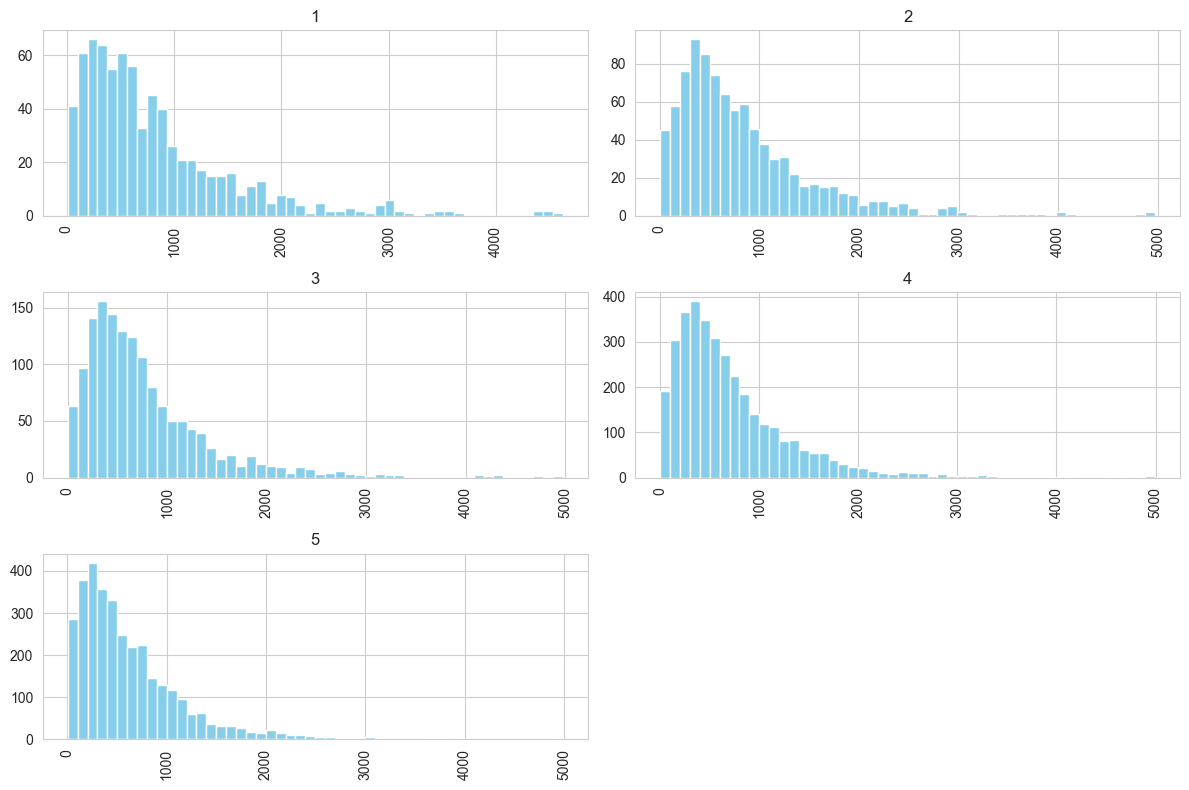

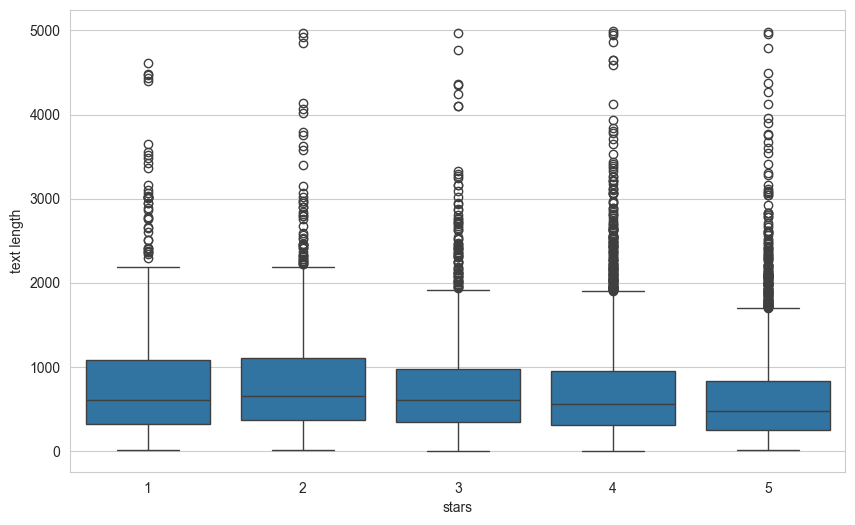

In [7]:
%matplotlib inline
sns.set_style('whitegrid')
df.hist(column='text length', by='stars', bins=50, figsize=(12, 8), color='skyblue')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='text length', data=df)
plt.show()

### Використовуючи графік, дослідіть кількість оцінок у датасеті.

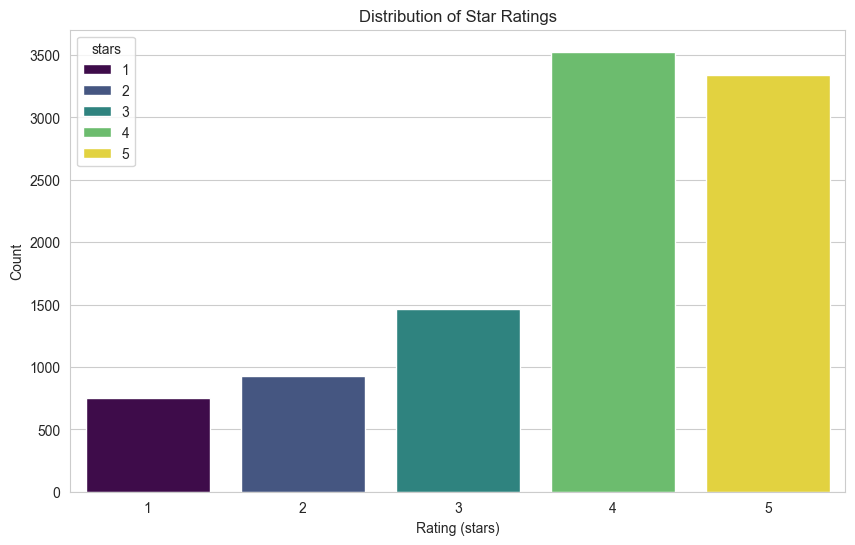

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=df, palette='viridis', hue='stars')
plt.title('Distribution of Star Ratings')
plt.xlabel('Rating (stars)')
plt.ylabel('Count')
plt.show()

## Класифікація без TF-IDF.

### Створіть два об'єкт `X` та `y`. У `Х` запишіть повідомлення, які після обробки будуть подаватись на вхід моделі. У `у` запишіть кількість зірок, які користувачі ставили бізнесам.

In [9]:
X = df['text']
y = df['stars']


### Створіть об'єкт __CountVectorizer__.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

### Перетворіть текстові дані у вектори.

In [11]:
X = count_vector.fit_transform(X)

### Розділіть дані на тестовий та тренувальний набори.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(8000, 29185)
(2000, 29185)


### Створіть об'єкт класифікатора.

In [13]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Натренуйте модель.

In [14]:
nb.fit(X_train, y_train)

MultinomialNB()

### Зробіть передбачення.

In [15]:
predictions = nb.predict(X_test)

### Оцініть роботу класифікатора з використанням матриці конфузії та звіту класифікації.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 40  16  14  57  15]
 [ 15  16  23  95  17]
 [  6   5  31 213  34]
 [ 10   6  15 529 179]
 [  4   4   5 269 382]]
              precision    recall  f1-score   support

           1       0.53      0.28      0.37       142
           2       0.34      0.10      0.15       166
           3       0.35      0.11      0.16       289
           4       0.45      0.72      0.56       739
           5       0.61      0.58      0.59       664

    accuracy                           0.50      2000
   macro avg       0.46      0.36      0.37      2000
weighted avg       0.49      0.50      0.46      2000



## Класифікація з TF-IDF та pipeline.

### Створіть об'єкт pipeline з відповідними кроками. Використайте у одному з кроків TF-IDF.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

### Перестворіть об'єкти `X` та `y` з тими самим даними. Розділіть дані на тестові та тренувальні. 

In [18]:
df = pd.read_csv('yelp.csv')

X = df['text']
y = df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

### Натренуйте модель використовуючи pipeline.

In [19]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

### Зробіть передачення використовуючи pipeline.

In [20]:
tfidf_predictions = pipeline.predict(X_test)
tfidf_predictions

array([4, 5, 4, ..., 4, 4, 4])

### Оцініть роботу класифікатора з використанням матриці конфузії та звіту класифікації.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, tfidf_predictions))
print(classification_report(y_test, tfidf_predictions))

[[  1   0   0 122  19]
 [  0   0   0 149  17]
 [  0   0   0 276  13]
 [  0   0   0 666  73]
 [  0   0   0 438 226]]
              precision    recall  f1-score   support

           1       1.00      0.01      0.01       142
           2       0.00      0.00      0.00       166
           3       0.00      0.00      0.00       289
           4       0.40      0.90      0.56       739
           5       0.65      0.34      0.45       664

    accuracy                           0.45      2000
   macro avg       0.41      0.25      0.20      2000
weighted avg       0.44      0.45      0.36      2000



/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

### Зробіть висновок про ефективність роботи TF-IDF для цього набору даних.

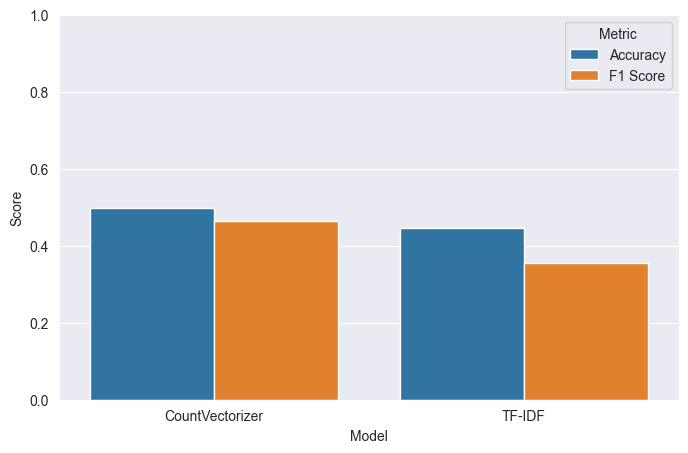

In [22]:
from sklearn.metrics import accuracy_score, f1_score

cv_accuracy = accuracy_score(y_test, predictions)
tfidf_accuracy = accuracy_score(y_test, tfidf_predictions)

cv_f1 = f1_score(y_test, predictions, average='weighted')
tfidf_f1 = f1_score(y_test, tfidf_predictions, average='weighted')

df_scores = pd.DataFrame({
    'Model': ['CountVectorizer','CountVectorizer','TF-IDF','TF-IDF'],
    'Metric': ['Accuracy','F1 Score','Accuracy','F1 Score'],
    'Score': [cv_accuracy, cv_f1, tfidf_accuracy, tfidf_f1]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=df_scores, x='Model', y='Score', hue='Metric')
plt.ylim(0, 1)
plt.show()